# Pakistani EDA

In [25]:
import numpy as np
import pandas as pd
import sklearn.preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import string
import nltk
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
from keras.utils import np_utils
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
sns.set()

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
df=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Thesis/Bpd.xlsx") 

In [28]:
df.head()

,Cases,Diagnosis,Mood-Stabilizer,Antipsychotic,Sleeping pills
0,Patient displayed aggressive and violent behav...,Bipolar I,Lithium,Seroquel,Rivotril
1,The patient exhibited aggressive and violent b...,Bipolar I,Lithium,Seroquel,Rivotril
2,The patient had ADHD like systems and extremel...,Bipolar I,Lithium,Seroquel,Rivotril
3,The patient lacks the attention span and obser...,Bipolar I,Lithium,Seroquel,Rivotril
4,The patient showed several inability to focus ...,Bipolar I,Lithium,Seroquel,Rivotril


In [29]:
df.tail()

,Cases,Diagnosis,Mood-Stabilizer,Antipsychotic,Sleeping pills
145,"The patient experienced extreme mood swings, c...",BipolarII,Epival,Risperidone,None
146,"The patient beat his family in a crazy frenzy,...",BipolarII,Epival,Risperidone,None
147,The patient was addicted to drugs in a manic p...,BipolarII,Epival,Risperidone,None
148,"The patient lived in isolation, playing video ...",BipolarII,Epival,Risperidone,None
149,The patient violently attacked a classmate dur...,BipolarII,Epival,Risperidone,None


In [30]:
df['Diagnosis'].value_counts()

BipolarII    75
Bipolar I    75
Name: Diagnosis, dtype: int64

In [31]:
df['Mood-Stabilizer'].value_counts()

Lithium    75
Epival     75
Name: Mood-Stabilizer, dtype: int64

In [32]:
df['Antipsychotic'].value_counts()

Risperidone    75
Seroquel       75
Name: Antipsychotic, dtype: int64

In [33]:
df.dtypes

Cases              object
Diagnosis          object
Mood-Stabilizer    object
Antipsychotic      object
Sleeping pills     object
dtype: object

In [34]:
df.shape

(150, 5)

In [35]:
df.describe()

,Cases,Diagnosis,Mood-Stabilizer,Antipsychotic,Sleeping pills
count,150,150,150,150,150
unique,150,2,2,2,2
top,The patient experienced too many mood swings d...,BipolarII,Lithium,Risperidone,Rivotril
freq,1,75,75,75,75


Text(0.5, 1.0, 'Diagnosis')

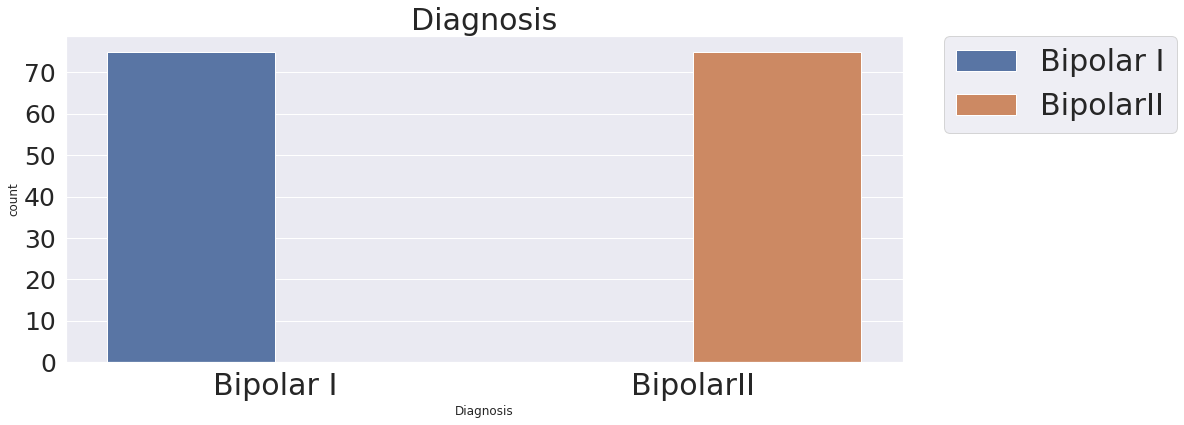

In [36]:
plt.figure(figsize=(15,6))
sns.countplot(x="Diagnosis",hue="Diagnosis",data=df,)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title("Diagnosis",fontsize=30)

Text(0.5, 1.0, 'Mood Stabilizer')

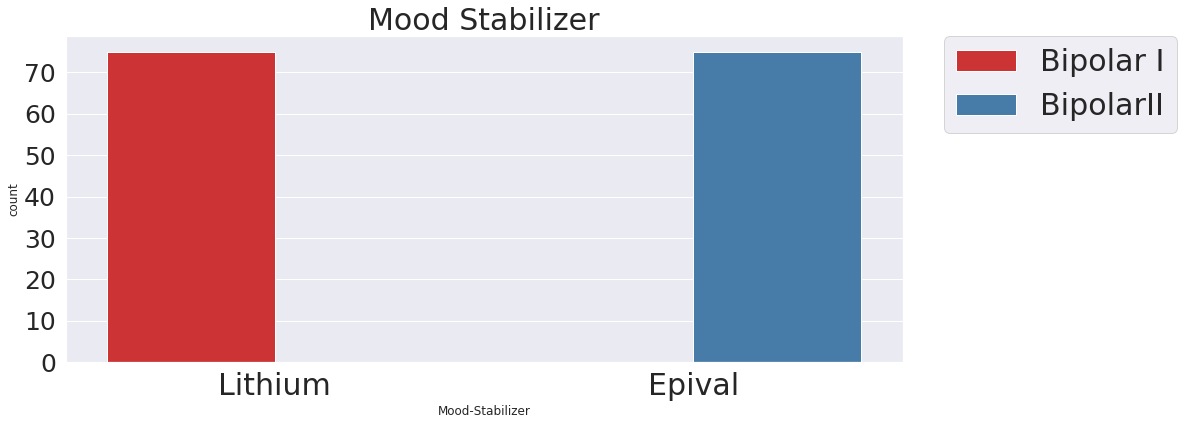

In [37]:
plt.figure(figsize=(15,6))
sns.countplot(x="Mood-Stabilizer",hue="Diagnosis",data=df,palette="Set1")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title("Mood Stabilizer",fontsize=30)

Text(0.5, 1.0, 'Antipsychotic')

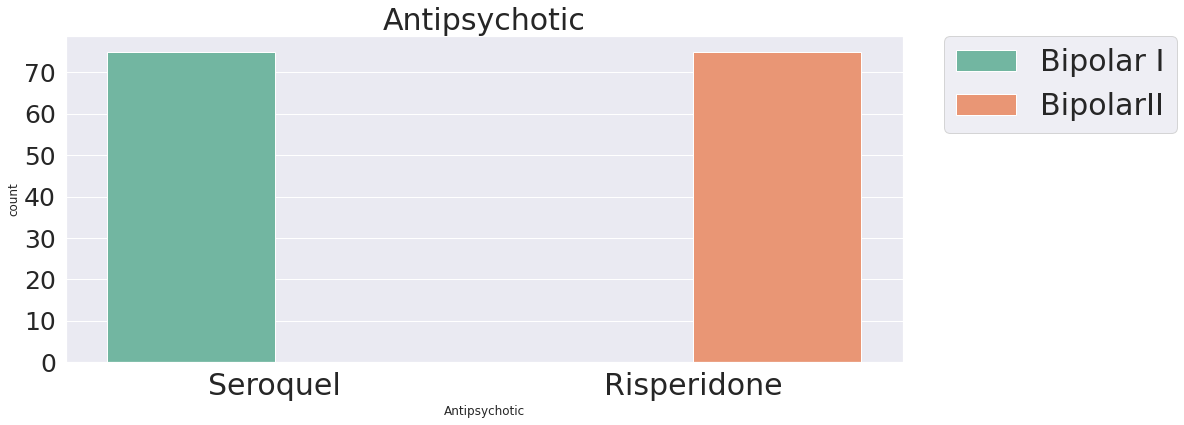

In [38]:
plt.figure(figsize=(15,6))
sns.countplot(x="Antipsychotic",hue="Diagnosis",data=df,palette="Set2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title("Antipsychotic",fontsize=30)

Text(0.5, 1.0, 'Sleeping Pills')

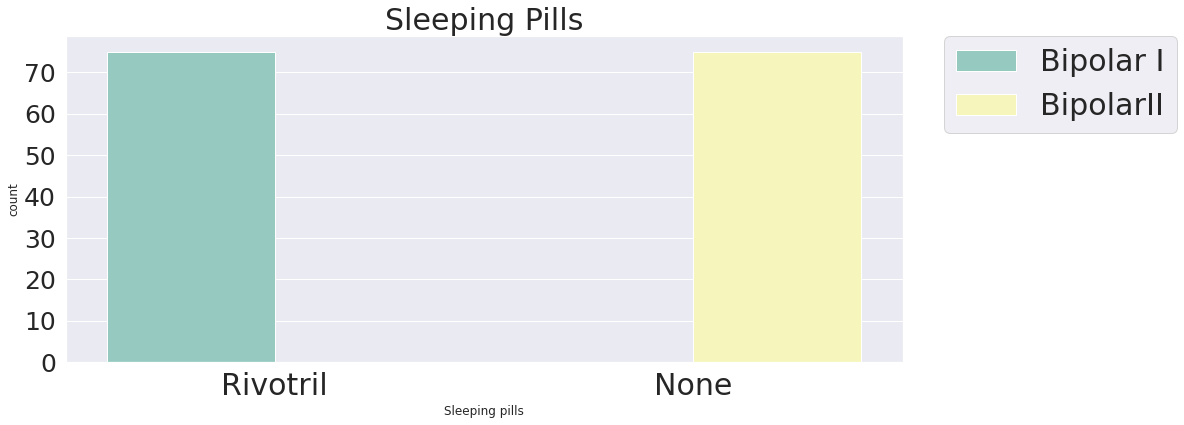

In [39]:
plt.figure(figsize=(15,6))
sns.countplot(x="Sleeping pills",hue="Diagnosis",data=df,palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title("Sleeping Pills",fontsize=30)

In [40]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [41]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
df1 = df[['Cases','Diagnosis']]
df1.isnull().sum()

Cases        0
Diagnosis    0
dtype: int64

In [43]:
df1.head()

,Cases,Diagnosis
0,Patient displayed aggressive and violent behav...,Bipolar I
1,The patient exhibited aggressive and violent b...,Bipolar I
2,The patient had ADHD like systems and extremel...,Bipolar I
3,The patient lacks the attention span and obser...,Bipolar I
4,The patient showed several inability to focus ...,Bipolar I


In [44]:
df1.tail()

,Cases,Diagnosis
145,"The patient experienced extreme mood swings, c...",BipolarII
146,"The patient beat his family in a crazy frenzy,...",BipolarII
147,The patient was addicted to drugs in a manic p...,BipolarII
148,"The patient lived in isolation, playing video ...",BipolarII
149,The patient violently attacked a classmate dur...,BipolarII


In [45]:
    #lower casing
    df['Cases'] = df['Cases'].str.lower()

    #punctuation removal         
    df["Cases"] = df["Cases"].apply(lambda text: remove_punctuation(text))

In [46]:
df1.head()

,Cases,Diagnosis
0,Patient displayed aggressive and violent behav...,Bipolar I
1,The patient exhibited aggressive and violent b...,Bipolar I
2,The patient had ADHD like systems and extremel...,Bipolar I
3,The patient lacks the attention span and obser...,Bipolar I
4,The patient showed several inability to focus ...,Bipolar I


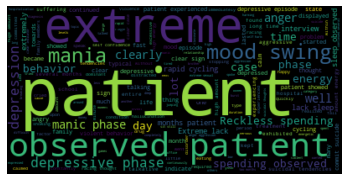

In [47]:
common_words=''
for i in df1.Cases:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
wordcloud = wordcloud.WordCloud().generate(common_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [49]:
df2=df1

In [50]:
le = LabelEncoder()
le.fit(df1['Diagnosis'])
df2['Diagnosis'] = le.transform(df2['Diagnosis'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
Y  = np_utils.to_categorical(df2['Diagnosis'], 2)

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(df2['Cases'], Y, test_size = 0.30, random_state = 7, shuffle = True)

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
max_feature_num = 500
vectorizer = TfidfVectorizer(max_features=max_feature_num)
train_vecs = vectorizer.fit_transform(X_train)
test_vecs = TfidfVectorizer(max_features=max_feature_num, vocabulary=vectorizer.vocabulary_).fit_transform(X_test)


In [55]:
model = Sequential()

model.add(Dense(64, activation='relu', input_dim = train_vecs.shape[1]))
model.add(Dense(32, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(32, activation='relu'))

model.add(Dense(2, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                32064     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 34,210
Trainable params: 34,210
Non-trainable params: 0
_________________________________________________________________


In [57]:

model.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [58]:
hist = model.fit(train_vecs.toarray(), Y_train, epochs = 10, verbose = 1, validation_split = 0.2) 

Epoch 1/10
3/3 [==============================] - 1s 103ms/step - loss: 0.6962 - accuracy: 0.4405 - val_loss: 0.6911 - val_accuracy: 0.5238
Epoch 2/10
3/3 [==============================] - 0s 15ms/step - loss: 0.6878 - accuracy: 0.6548 - val_loss: 0.6890 - val_accuracy: 0.5238
Epoch 3/10
3/3 [==============================] - 0s 15ms/step - loss: 0.6814 - accuracy: 0.8095 - val_loss: 0.6865 - val_accuracy: 0.6667
Epoch 4/10
3/3 [==============================] - 0s 14ms/step - loss: 0.6748 - accuracy: 0.9167 - val_loss: 0.6832 - val_accuracy: 0.6667
Epoch 5/10
3/3 [==============================] - 0s 17ms/step - loss: 0.6675 - accuracy: 0.9524 - val_loss: 0.6786 - val_accuracy: 0.7619
Epoch 6/10
3/3 [==============================] - 0s 17ms/step - loss: 0.6588 - accuracy: 0.9643 - val_loss: 0.6735 - val_accuracy: 0.8095
Epoch 7/10
3/3 [==============================] - 0s 14ms/step - loss: 0.6497 - accuracy: 0.9643 - val_loss: 0.6665 - val_accuracy: 0.8095
Epoch 8/10
3/3 [==========

In [59]:
df_w2v = df2.copy() 
df_w2v.head()

,Cases,Diagnosis
0,Patient displayed aggressive and violent behav...,0
1,The patient exhibited aggressive and violent b...,0
2,The patient had ADHD like systems and extremel...,0
3,The patient lacks the attention span and obser...,0
4,The patient showed several inability to focus ...,0


In [61]:
import spacy
def tokenizer(str):
    nlp = spacy.blank('ur')
    doc = nlp.tokenizer(str)
    return [i.text for i in doc]
df_w2v["tokens"] = df_w2v["Cases"].apply(tokenizer)

In [62]:
import gensim

model_word2vec = gensim.models.Word2Vec(sentences=df_w2v["tokens"], size=128, window=5, workers=10, min_count = 1)

In [63]:
VOCAB_SIZE = len(model_word2vec.wv.vocab)
DIMENSIONS = 128
MAX_LEN = max([len(x) for x in df_w2v["tokens"]])

In [64]:
from keras.preprocessing.text import Tokenizer
token = Tokenizer()
token.fit_on_texts(df_w2v["tokens"])
encoded = token.texts_to_sequences(df_w2v["tokens"])

In [65]:
words2vec_matrix = np.zeros((VOCAB_SIZE+1,DIMENSIONS))
for word, index in token.word_index.items():
    try:
        words2vec_matrix[index] = model_word2vec.wv[word]
    except:
        pass

In [67]:
import tensorflow as tf
train_vectors = tf.keras.preprocessing.sequence.pad_sequences(encoded,padding='post',dtype=int)

In [69]:
train_label = df_w2v.Diagnosis

In [70]:
(train_sentences,test_sentences, train_tags, test_tags) = train_test_split(train_vectors, train_label, test_size=0.2, shuffle = True)

In [71]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
from tensorflow.keras.optimizers import Adam, Optimizer, SGD
import tensorflow.keras.initializers as Init
from tensorflow.keras import regularizers

In [75]:
lstm = Models.Sequential()

lstm.add(Layers.Embedding(VOCAB_SIZE+1,DIMENSIONS,
                          embeddings_initializer = Init.Constant(words2vec_matrix),
                          input_length=MAX_LEN, trainable=False ))

lstm.add(Layers.Bidirectional(Layers.LSTM(256, activation='tanh')))

lstm.add(Layers.Dense(128, activation='tanh'))
lstm.add(Layers.Dropout(0.3))

lstm.add(Layers.Dense(64, activation='tanh'))
lstm.add(Layers.Dropout(0.3))

lstm.add(Layers.Dense(1, activation='sigmoid'))

lstm.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 57, 128)           114432    
_________________________________________________________________
bidirectional (Bidirectional (None, 512)               788480    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [76]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
 

lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es_callback = EarlyStopping(monitor='val_loss', patience=3) 
LSTM_NET = lstm.fit(train_sentences, train_tags, epochs=10, validation_split=0.2, callbacks=[es_callback], shuffle=False)

Epoch 1/10
3/3 [==============================] - 5s 890ms/step - loss: 0.6870 - accuracy: 0.4792 - val_loss: 0.6691 - val_accuracy: 0.6250
Epoch 2/10
3/3 [==============================] - 1s 504ms/step - loss: 0.6260 - accuracy: 0.6667 - val_loss: 0.6718 - val_accuracy: 0.5833
Epoch 3/10
3/3 [==============================] - 1s 512ms/step - loss: 0.6491 - accuracy: 0.6458 - val_loss: 0.6888 - val_accuracy: 0.6250
Epoch 4/10
3/3 [==============================] - 1s 507ms/step - loss: 0.5975 - accuracy: 0.6771 - val_loss: 0.6876 - val_accuracy: 0.5000


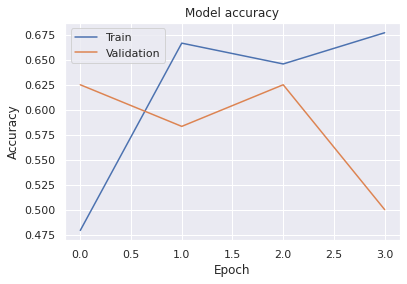

In [77]:
plt.plot(LSTM_NET.history['accuracy'])
plt.plot(LSTM_NET.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [79]:
lstm.evaluate(test_sentences,test_tags)

1/1 [==============================] - 0s 112ms/step - loss: 0.5452 - accuracy: 0.7333


[0.5451510548591614, 0.7333333492279053]

In [81]:
model = Models.Sequential()

model.add(Layers.Embedding(VOCAB_SIZE+1,DIMENSIONS,
                           embeddings_initializer = Init.Constant(words2vec_matrix),
                           input_length=MAX_LEN, trainable=False ))

model.add(Layers.Conv1D(512, 5, activation="relu"))
model.add(Layers.MaxPooling1D(5))

model.add(Layers.Flatten())

model.add(Layers.Dense(32, activation='relu', kernel_regularizer = regularizers.l2(1e-4)))
model.add(Layers.Dropout(0.6))

model.add(Layers.Dense(1,activation='sigmoid'))

model.summary()

model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 57, 128)           114432    
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 53, 512)           328192    
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 10, 512)           0         
_________________________________________________________________
flatten (Flatten)            (None, 5120)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                163872    
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [83]:
CONV_NET = model.fit( train_sentences, train_tags, epochs=50, validation_split=0.20 )

Epoch 1/50
3/3 [==============================] - 0s 90ms/step - loss: 0.5184 - accuracy: 0.7292 - val_loss: 0.6281 - val_accuracy: 0.6250
Epoch 2/50
3/3 [==============================] - 0s 78ms/step - loss: 0.5698 - accuracy: 0.7292 - val_loss: 0.6175 - val_accuracy: 0.6667
Epoch 3/50
3/3 [==============================] - 0s 77ms/step - loss: 0.4999 - accuracy: 0.7292 - val_loss: 0.6142 - val_accuracy: 0.6667
Epoch 4/50
3/3 [==============================] - 0s 84ms/step - loss: 0.5169 - accuracy: 0.7292 - val_loss: 0.6149 - val_accuracy: 0.7083
Epoch 5/50
3/3 [==============================] - 0s 74ms/step - loss: 0.5109 - accuracy: 0.7396 - val_loss: 0.6179 - val_accuracy: 0.6667
Epoch 6/50
3/3 [==============================] - 0s 74ms/step - loss: 0.4878 - accuracy: 0.7604 - val_loss: 0.6178 - val_accuracy: 0.6667
Epoch 7/50
3/3 [==============================] - 0s 78ms/step - loss: 0.4534 - accuracy: 0.8333 - val_loss: 0.6187 - val_accuracy: 0.7083
Epoch 8/50
3/3 [===========

In [84]:
print(classification_report(model.predict(test_sentences).round(), test_tags))

              precision    recall  f1-score   support

         0.0       0.73      0.79      0.76        14
         1.0       0.80      0.75      0.77        16

    accuracy                           0.77        30
   macro avg       0.77      0.77      0.77        30
weighted avg       0.77      0.77      0.77        30

